Planned Parenthood is a service available in the United States that provides sexual and women's health services, including birth control, STI testing, HPV vaccinations, and abortion services. Though there is contraversy over some of the services offered and whether Planned Parenthood should continue to be available. In this project, I explore how the availability of Planned Parenthood services impacts rates of sexual and women's health issues and answer the following question:

**Can access to Planned Parenthood improve women's and sexual health?**

Population and square milage data for this data are from the 2016 US census and 2000 geography US census, respectively. The number of Planned Parenthood locations is from the Planned Parenthood website. Teenage birth rates, STI rates, and cervical cancer rates are pulled from the CDC.

These rates were selected for comparison because they are issues that can be assuaged with the services provided by Planned Parenthood. Teenage birth rates can be lowered by access to birth control, cervical cancer can be prevented by HPV vaccinations, and chlamydia and gonorrhea are both curable STIs, so treating them early can prevent their spread.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import folium

The data described was cleaned in Excel and compiled into one spreadsheet. Teen birth rate is given as number of births per 1000 females age 15-19, cervical cancer rate is cases per 100,000 women, and chlamydia and gonorrhea rates are cases per 100,000 people.

In [2]:
data = pd.read_csv('honorsopdata1.csv')
data.head()

,STATE,NUM_LOC,POP,AREA,POP_PER_SQMI,LOC_PER_POP,LOC_PER_SQMI,TB_RATE,CC_RATE,CHLA_RATE,GON_RATE
0,AL,2,4887871,50645,96.512410,4.091760e-07,0.000039,27.0,9.4,615.5,245.7
1,AK,5,737438,570641,1.292298,6.780230e-06,0.000009,22.0,8.2,799.8,295.1
2,AZ,7,7171646,113594,63.134021,9.760660e-07,0.000062,22.0,7.3,571.3,180.4
3,AR,2,3013825,52035,57.919189,6.636090e-07,0.000038,32.8,10.4,579.6,224.5
4,CA,108,39559045,155779,253.943375,2.730100e-06,0.000693,15.1,7.1,557.4,192.0


To begin, we should take a look at the data. I will create several maps using folium to allow us to look at Planned Parenthood availability and the other data by state.

In [11]:
# read in the geographic data and make the maps
state_geo = r'./states.json'

map0 = folium.Map(location=[48, -102], zoom_start=3)
map0.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'NUM_LOC'],
             key_on='feature.id', bins=9,
             fill_color='YlGnBu', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Number of PP Locations', smooth_factor=0.1, highlight=True)

map1 = folium.Map(location=[48, -102], zoom_start=3)
map1.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'LOC_PER_POP'],
             key_on='feature.id', bins=9,
             fill_color='YlGnBu', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Locations per Population', smooth_factor=0.1, highlight=True)

map2 = folium.Map(location=[48, -102], zoom_start=3)
map2.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'LOC_PER_SQMI'],
             key_on='feature.id', bins=9,
             fill_color='YlGnBu', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Locations per Square Mile', smooth_factor=0.1, highlight=True)

map3 = folium.Map(location=[48, -102], zoom_start=3)
map3.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'TB_RATE'],
             key_on='feature.id', bins=8,
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Teenage Birth Rate', smooth_factor=0.1, highlight=True)

map4 = folium.Map(location=[48, -102], zoom_start=3)
map4.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'CC_RATE'],
             key_on='feature.id', bins=8,
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Cervical Cancer Rate', smooth_factor=0.1, highlight=True)

map5 = folium.Map(location=[48, -102], zoom_start=3)
map5.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'CHLA_RATE'],
             key_on='feature.id', bins=8,
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Chlamydia Rate of Infection', smooth_factor=0.1, highlight=True)

map6 = folium.Map(location=[48, -102], zoom_start=3)
map6.choropleth(geo_data=state_geo, data=data,
             columns=['STATE', 'GON_RATE'],
             key_on='feature.id', bins=8,
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Gonorrhea Rate of Infection', smooth_factor=0.1, highlight=True)


/Users/EmmaBrann/anaconda3/lib/python3.6/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [12]:
map0

In [16]:
map1

In [17]:
map2

In [18]:
map3

In [19]:
map4

In [20]:
map5

In [21]:
map6

Visually, it appears that there is probably some correlation between availability of Planned Parenthood and the rest of the data. We will need to use further data analysis techniques to prove this.

In the following cells, I will use scipy.optimize.curve_fit to try a few different fits on the data, to see which sets are correlated and how they are correlated. I will look at linear, quadratic, and exponential fits for the data, and compare the Planned Parenthood data with the sexual/women's health data.

In [22]:
from scipy.optimize import curve_fit
# store the data and labels in dictionaries so we can grab it quickly in a loop
pp_dict = {0 : data['NUM_LOC'], 1 : data['LOC_PER_POP'], 2 : data['LOC_PER_SQMI']}
rates_dict = {0 : data['TB_RATE'], 1 : data['CC_RATE'], 2 : data['CHLA_RATE'], 3 : data['GON_RATE']}
pp_labels = {0 : 'NUM_LOC', 1 : 'LOC_PER_POP', 2 : 'LOC_PER_SQMI'}
rates_labels = {0 : 'TB_RATE', 1 : 'CC_RATE', 2 : 'CHLA_RATE', 3 : 'GON_RATE'}

In [23]:
# define the functions 
def lin(x, a, b):
    """returns a linear function of x"""
    return a*x + b
def quad(x, a, b, c):
    """returns a quadratic function of x"""
    return a*(x**2) + b*x + c
def exp(x, a, b, c):
    """returns an exponential function of x"""
    return a*np.exp(b*x) + c

In [25]:
# initialize some lists to store our results
data_codes = []
lin_popt = []
quad_popt = []
exp_popt = []

error_codes = []

for i in range(len(pp_dict)):
    for j in range(len(rates_dict)):
        try:
            # pull the data for this trial from the dictionaries
            x = pp_dict[i]
            y = rates_dict[j]
        
            # run all three models with curve_fit
            popt_lin, pcov_lin = curve_fit(lin, x, y)
        
            popt_quad, pcov_quad = curve_fit(quad, x, y)
            
            popt_exp, pcov_exp = curve_fit(exp, x, y)
        
            
            # append all the lists
            data_codes.append((i,j))
            lin_popt.append(popt_lin)
            quad_popt.append(popt_quad)
            exp_popt.append(popt_exp)
            
        except:
            # tells if any of the data could not be fit by the models
            error_codes.append((i,j))


/Users/EmmaBrann/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


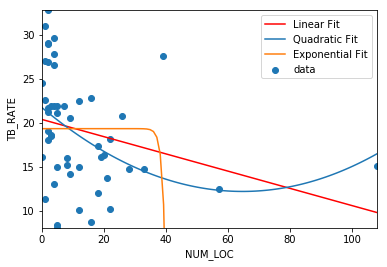

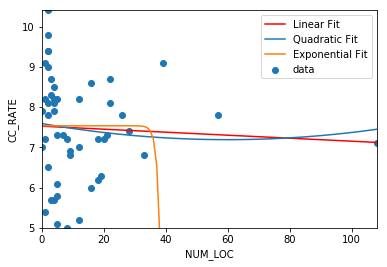

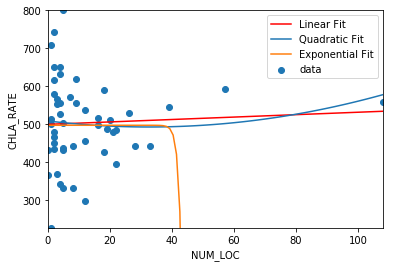

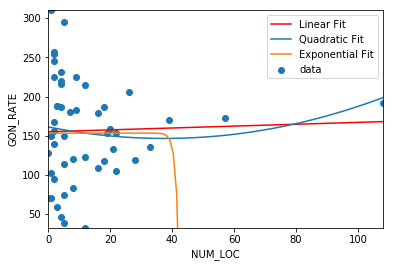

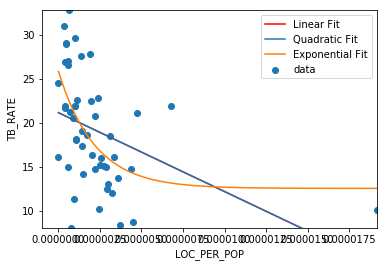

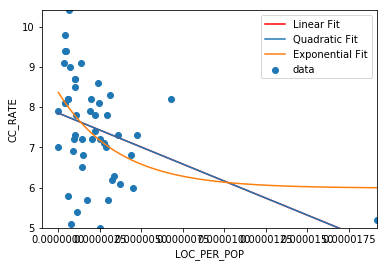

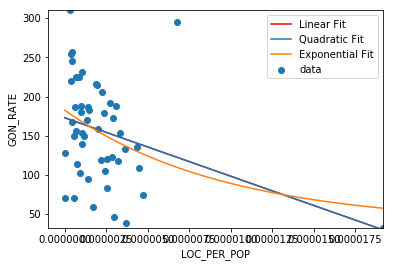

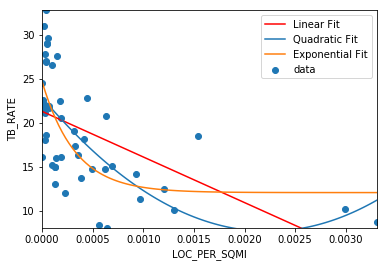

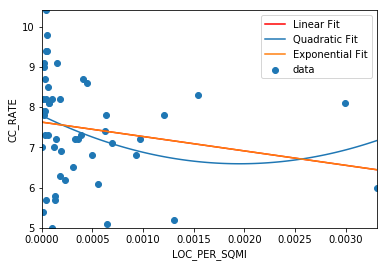

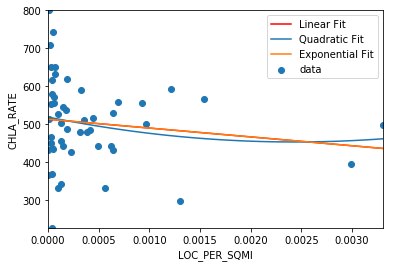

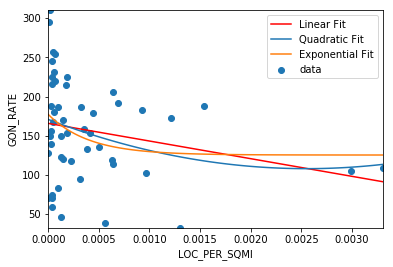

In [26]:
# making the lines of best fit and plotting
xdata_0 = np.linspace(min(pp_dict[0]), max(pp_dict[0]), 100)
xdata_1 = np.linspace(min(pp_dict[1]), max(pp_dict[1]), 100)
xdata_2 = np.linspace(min(pp_dict[2]), max(pp_dict[2]), 100)

# dictionary for easy use in the loop below
pp_dict_np = {0 : xdata_0, 1 : xdata_1, 2 : xdata_2}

for i in range(len(data_codes)):
    x = data_codes[i][0]
    y = data_codes[i][1]
    # plot the data with all the curves on a new set of axes
    plt.figure(i)
    plt.scatter(pp_dict[x], rates_dict[y], label='data')
    plt.plot(pp_dict_np[x], lin(pp_dict_np[x], *lin_popt[i]), 'r-', label='Linear Fit')
    plt.plot(pp_dict_np[x], quad(pp_dict_np[x], *quad_popt[i]), label='Quadratic Fit')
    plt.plot(pp_dict_np[x], exp(pp_dict_np[x], *exp_popt[i]), label='Exponential Fit')
    plt.xlabel(pp_labels[x])
    plt.ylabel(rates_labels[y])
    plt.xlim(min(pp_dict[x])-.000001, max(pp_dict[x]))
    plt.ylim(min(rates_dict[y]), max(rates_dict[y]))
    plt.legend()
    

We can see from this code that curve fitting will not be a great predictor for this data, and we will need to try other methods to analyze this data. It will also be best for us to analyze all of the data at once, since it doesn't seem like any two data sets have a strong enough correlation. However, nearly all of the plots show a negative correlation with Planned Parenthood access and sexual and women's health issues. So, if we can prove with machine learning techniques that the data is correlated, we can deduce that this correlation is negative: less access to Planned Parenthood leads to higher rates of these issues.

We will try some machine learning techniques to analyze the data. First, I will split the data into a test set and a train set. Then, I will try different machine learning techniques to see if we can find a correlation.

In [4]:
# split the data and store the indices in lists
train_codes = []
test_codes = []
for i in range(len(data)):
    r = np.random.random()
    if r < .75:
        train_codes.append(i)
    else:
        test_codes.append(i)
print('Number of train vectors', len(train_codes))
print('Number of test vectors', len(test_codes))

Number of train vectors 44
Number of test vectors 6


In [5]:
# create vectors that include relevant information: population, area, and the rates of sexual and women's health issues
# create target vectors with the number of Planned Parenthood locations
train_vectors = []
test_vectors = []
train_target = []
test_target = []

for i in range(len(data)):
    # fill the vectors using only the raw data, not the derived columns (POP_PER_SQMI, etc)
    new_vect = []
    new_vect.append(data['POP'][i])
    new_vect.append(data['AREA'][i])
    new_vect.append(data['TB_RATE'][i])
    new_vect.append(data['CC_RATE'][i])
    new_vect.append(data['CHLA_RATE'][i])
    new_vect.append(data['GON_RATE'][i])
    if i in train_codes:
        train_vectors.append(new_vect)
        train_target.append(data['NUM_LOC'][i])
    elif i in test_codes:
        test_vectors.append(new_vect)
        test_target.append(data['NUM_LOC'][i])

# make sure appending the lists worked correctly - should return true and true
print(len(train_vectors) == len(train_codes))
print(len(test_vectors) == len(test_codes))

True
True


First we will look at a neural network. I increased the hidden layer size and maximum number of iterations, and decreased the initial step size. I also set the learning rate to invscaling, which decreases the step size as the model progresses.

In [157]:
from sklearn.neural_network import MLPRegressor

model1 = MLPRegressor(hidden_layer_sizes=250, learning_rate = 'invscaling',
                      learning_rate_init=0.00000001, max_iter = 100000000)
model1.fit(train_vectors, train_target)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=250, learning_rate='invscaling',
       learning_rate_init=1e-08, max_iter=100000000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

We will look at the accuracy of this model first by plotting the prediction vs the actual. Since the prediction should equal the actual, this data theoretically should be well fit with a $y=x$ line. We will plot this line with the data for a visual.

(0, 60)

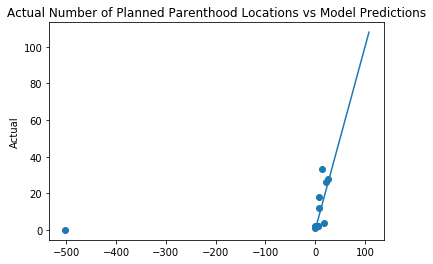

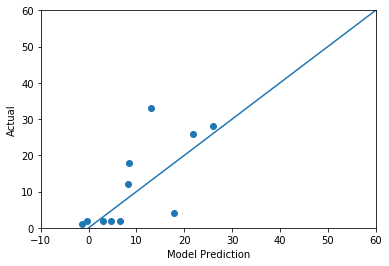

In [158]:
model1_predict = model1.predict(test_vectors)
theoretical = [0,108]

plt.figure(0)
plt.scatter(model1_predict, test_target)
plt.plot(theoretical, theoretical)
plt.ylabel('Actual')
plt.title('Actual Number of Planned Parenthood Locations vs Model Predictions')

plt.figure(1)
plt.scatter(model1_predict, test_target)
plt.plot(theoretical, theoretical)
plt.xlabel('Model Prediction')
plt.ylabel('Actual')
plt.xlim(-10,60)
plt.ylim(0,60)

In [6]:
def compute_accuracy(model, target):
    """Computes the accuracy of a model. 1 is the target value."""
    acc = []
    for i in range(len(target)):
        if target[i] != 0:
            a = model[i]/target[i]
            acc.append(a)
    acc = np.array(acc)
    return np.mean(acc)
            

In [197]:
acc1 = compute_accuracy(model1_predict, test_target)
print(acc1)

1.2125359211845046


With a huge neural network, the model is relatively accurate. This is highly suggestive of a correlation between the data and the number of Planned Parenthoods in a given state.

This model approaches the data with a binary classification by building a support vector machine. If we classify great access to Planned Parenthood as 1 and poor access as -1, we can write equations for high and low unemployment as the following:

$$
w_1 x_1 + w_2 x_2 + w_0 \geq 1
$$

or

$$
w_1 x_1 + w_2 x_2 + w_0 \leq -1
$$

where $x_1$ and $x_2$ are two of the secondary data sets. This problem can be rewritten as a matrix equation:

$$
\text{Minimize:} \quad\quad \frac{1}{2} w^T P w + q^T w
$$
$$
\text{Subject to:} \;\;\;\quad \quad\quad G w \leq h.
$$

$$
w = \left[
\begin{array}{c}
w_1  \\
w_2  \\
w_0
\end{array}
\right], \quad 
P = \left[
\begin{array}{ccc}
2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 0
\end{array}
\right], \quad 
q = \left[
\begin{array}{c}
0  \\
0  \\
0
\end{array}
\right], \quad 
h = \left[
\begin{array}{c}
-1  \\
-1  \\
\vdots  \\
-1
\end{array}
\right], \quad 
$$

Where $G$ is a matrix given by values from the two selected data sets and whether the data corresponds to low or high access. As of now, we do not know which data sets are most correlated with access to Planned Parenthood. This model will test all possible data combinations and their accuracy.

In [188]:
import cvxopt

model2_success = []
model2_failure = []

# initializing the matricies as described above
p = np.zeros((3,3))
for i in range(2):
    p[i,i] = 2

q = np.zeros((3,1))

h = np.zeros((45,1))
for j in range(len(h)):
    h[j,0] = -1
    
P = cvxopt.matrix(p, tc='d')
q = cvxopt.matrix(q, tc='d')
h = cvxopt.matrix(h, tc='d')

for i in range(len(pp_dict)):
    # find the median of the planned parenthood data currently in use
    pp_data = np.array(pp_dict[i])
    med = np.median(pp_data)
    
    # find the target values for the test vectors: -1 is below median, 1 is equal to or above median
    actual = []
    for m in test_codes:
        if pp_dict[i][m] >= med:
            actual.append(1)
        else:
            actual.append(-1)
    
    for j in range(len(rates_dict)):
        for k in range(len(rates_dict)):
            if j == k:
                pass
            else:
                # initializing the G matrix
                g = np.zeros((len(train_codes),3))
                for n in range(len(train_codes)):
                    code = train_codes[n]
                    if pp_dict[i][n] >= med:
                        g[n,0] = rates_dict[j][code]
                        g[n,1] = rates_dict[k][code]
                        g[n,2] = 1
                    else:
                        g[n,0] = -1*rates_dict[j][code]
                        g[n,1] = -1*rates_dict[k][code]
                        g[n,2] = -1
                        
                G = cvxopt.matrix(g, tc='d')
                
                # try running the model and see if there's an error
                
                try:
                    G = cvxopt.matrix(g, tc='d')
                    sol = cvxopt.solvers.qp(P,q,G,h)
                    
                    # get the results of the model
                    current_results = []
                    for r in test_codes:
                        val = 0
                        val += rates_dict[j][r]*sol['x'][0]
                        val += rates_dict[k][r]*sol['x'][1]
                        val += sol['x'][2]
                        
                    if val >= 0:
                        model_results.append(1)
                    else:
                        model_results.append(-1)
                        
                    # save the results of the model
                    
                    model2_success.append([i,j,k,sol,current_results])
                    
                except:
                    model2_failure.append([i,j,k])
                
        

In [189]:
print('Number of successes:', len(model2_success))
print('Number of failures:', len(model2_failure))

Number of successes: 0
Number of failures: 36


So, not a single data combination converged with this model. This tells us a few things about out data:

* No two data sets alone represent the correlation well. So, the data all works together.
* It was impossible to predict just one of the Planned Parenthood datasets. So, the sets must all contribute to the correlation of the data.
* The models need to consider all of the data rather than just looking at a little bit at a time. We also saw this with the curve fitting.

Decision trees are another model that can take large vector inputs. They are less complex than neural networks and can be visualized.

In [7]:
from sklearn import tree

model3 = tree.DecisionTreeRegressor()
model3.fit(train_vectors, train_target)
model3_predict = model3.predict(test_vectors)

(0, 60)

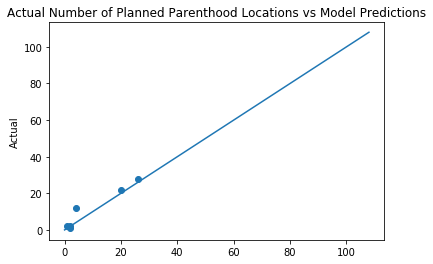

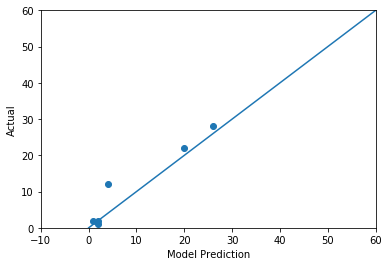

In [8]:
# same logic as the plots for the neural network
theoretical = [0,108]

plt.figure(0)
plt.scatter(model3_predict, test_target)
plt.plot(theoretical, theoretical)
plt.ylabel('Actual')
plt.title('Actual Number of Planned Parenthood Locations vs Model Predictions')

plt.figure(1)
plt.scatter(model3_predict, test_target)
plt.plot(theoretical, theoretical)
plt.xlabel('Model Prediction')
plt.ylabel('Actual')
plt.xlim(-10,60)
plt.ylim(0,60)

In [9]:
acc3 = compute_accuracy(model3_predict, test_target)
print(acc3)

0.9451659451659452


Here, we see good results without any big outliars. Like the neural network, this tells us that the number of Planned Parenthood is correlated with the sexual and women's health data.

From the machine learning models, it is clear that there is a correlation between access to Planned Parenthood and women's and sexual health issues, and from the curve fit models, we can see that it is a negative correlation. So, less access to Planned Parenthood is correlated with more instances of cervical cancer, teenage birth, and treatable STIs.